## LSTMs: Long-Short Term Memory Networks

Example of using a form of RNNs with short and long range memory.

In [ ]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(trainX, trainY, epochs=30, batch_size=1, verbose=2)

Epoch 1/30
94/94 - 4s - loss: 0.0468 - 4s/epoch - 41ms/step
Epoch 2/30
94/94 - 0s - loss: 0.0238 - 273ms/epoch - 3ms/step
Epoch 3/30
94/94 - 0s - loss: 0.0186 - 267ms/epoch - 3ms/step
Epoch 4/30
94/94 - 0s - loss: 0.0167 - 280ms/epoch - 3ms/step
Epoch 5/30
94/94 - 0s - loss: 0.0155 - 281ms/epoch - 3ms/step
Epoch 6/30
94/94 - 0s - loss: 0.0145 - 276ms/epoch - 3ms/step
Epoch 7/30
94/94 - 0s - loss: 0.0134 - 337ms/epoch - 4ms/step
Epoch 8/30
94/94 - 0s - loss: 0.0125 - 383ms/epoch - 4ms/step
Epoch 9/30
94/94 - 0s - loss: 0.0116 - 376ms/epoch - 4ms/step
Epoch 10/30
94/94 - 0s - loss: 0.0106 - 412ms/epoch - 4ms/step
Epoch 11/30
94/94 - 0s - loss: 0.0097 - 378ms/epoch - 4ms/step
Epoch 12/30
94/94 - 0s - loss: 0.0089 - 408ms/epoch - 4ms/step
Epoch 13/30
94/94 - 0s - loss: 0.0079 - 429ms/epoch - 5ms/step
Epoch 14/30
94/94 - 0s - loss: 0.0070 - 257ms/epoch - 3ms/step
Epoch 15/30
94/94 - 0s - loss: 0.0062 - 283ms/epoch - 3ms/step
Epoch 16/30
94/94 - 0s - loss: 0.0053 - 286ms/epoch - 3ms/step
Epo

2/2 [==============================] - 0s 30ms/step
Train Score: 22.85 RMSE
Test Score: 51.24 RMSE


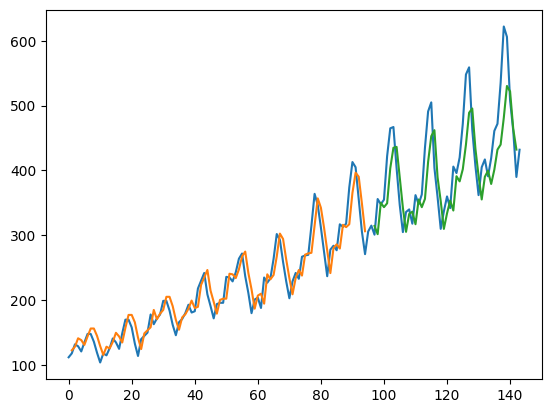

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend
plt.show()